<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [ ]:
!pip install yfinance

In [4]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [22]:
data = load_data('^VIX')
df=data
df = df[df['Date'] >= '2020-01-02']
df = df.reset_index(drop=True)
df.head()

/var/folders/w5/stmv05y902lgqhztwd4kh4lm0000gn/T/ipykernel_41628/3830313737.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,^VIX,^VIX,^VIX,^VIX,^VIX
0,2020-01-02,12.47,13.720000,12.42,13.46,0
1,2020-01-03,14.02,16.200001,13.13,15.01,0
2,2020-01-06,13.85,16.389999,13.54,15.45,0
3,2020-01-07,13.79,14.460000,13.39,13.84,0
4,2020-01-08,13.45,15.240000,12.83,15.16,0


In [23]:
df = df.drop(['Date', 'Volume'], axis = 1)
df.head()

/var/folders/w5/stmv05y902lgqhztwd4kh4lm0000gn/T/ipykernel_41628/1444969676.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Volume'], axis = 1)


Price,Close,High,Low,Open
Ticker,^VIX,^VIX,^VIX,^VIX
0,12.47,13.720000,12.42,13.46
1,14.02,16.200001,13.13,15.01
2,13.85,16.389999,13.54,15.45
3,13.79,14.460000,13.39,13.84
4,13.45,15.240000,12.83,15.16


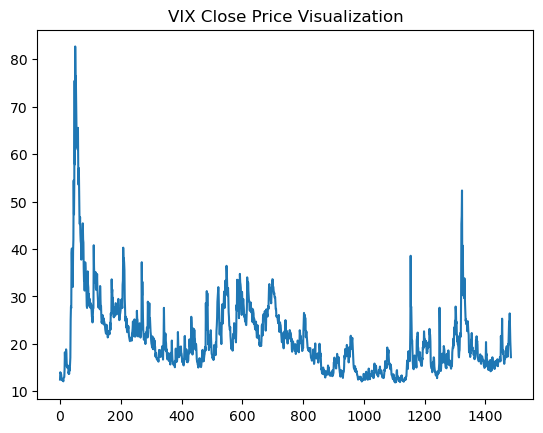

In [24]:
plt.title("VIX Close Price Visualization")
plt.plot(df.Close)

In [25]:
df

Price,Close,High,Low,Open
Ticker,^VIX,^VIX,^VIX,^VIX
0,12.470000,13.720000,12.420000,13.460000
1,14.020000,16.200001,13.130000,15.010000
2,13.850000,16.389999,13.540000,15.450000
3,13.790000,14.460000,13.390000,13.840000
4,13.450000,15.240000,12.830000,15.160000
...,...,...,...,...
1480,26.420000,28.270000,19.280001,20.780001
1481,23.430000,27.840000,22.540001,25.969999
1482,20.520000,23.680000,20.410000,22.690001


# Plotting moving averages of 100 day

---



In [26]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,^VIX
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1480,17.0257
1481,17.0936
1482,17.1350
1483,17.1427


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

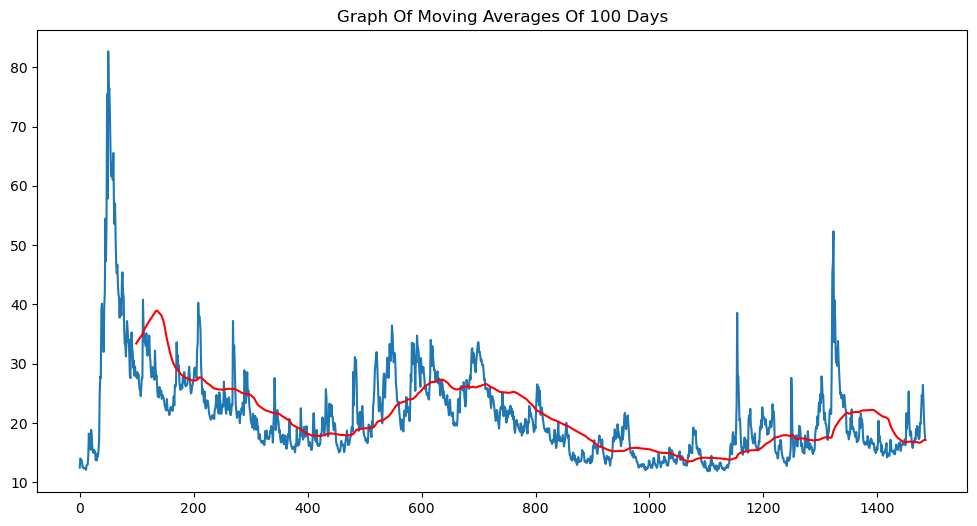

In [27]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [28]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,^VIX
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1480,19.57825
1481,19.61790
1482,19.63780
1483,19.65155


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

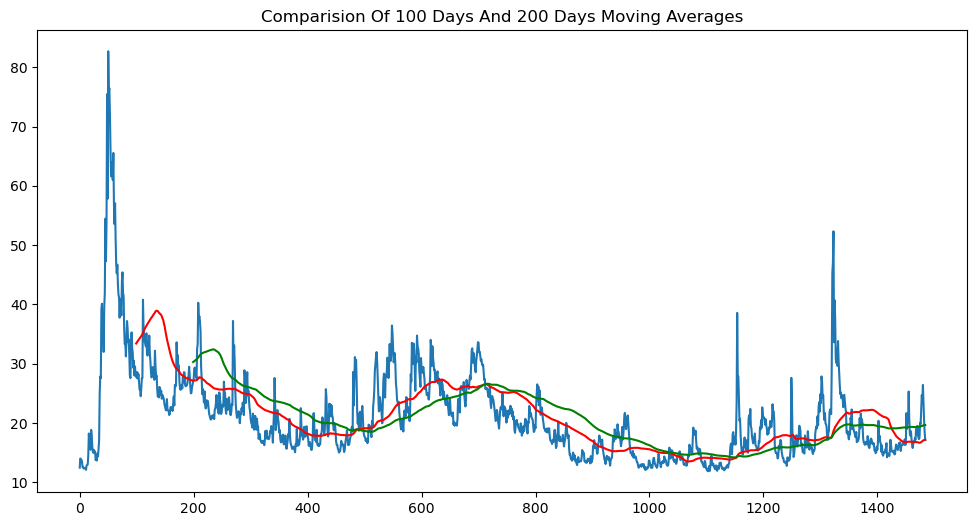

In [29]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [30]:
df.shape

(1485, 4)

# Spliting the dataset into training and testing set

In [31]:
# Splitting data into training and testing

train = data[data['Date'] < '2025-10-01']
test = data[data['Date'] >= '2025-10-01']

print(train.shape)
print(test.shape)

(2702, 6)
(41, 6)


In [32]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,^VIX,^VIX,^VIX,^VIX,^VIX
0,2015-01-02,17.790001,20.139999,17.049999,17.760000,0
1,2015-01-05,19.920000,21.290001,19.190001,19.190001,0
2,2015-01-06,21.120001,22.900000,19.520000,20.330000,0
3,2015-01-07,19.309999,20.719999,19.040001,20.150000,0
4,2015-01-08,17.010000,18.090000,16.990000,17.930000,0


In [33]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,^VIX,^VIX,^VIX,^VIX,^VIX
2702,2025-10-01,16.290001,17.280001,15.980000,17.280001,0
2703,2025-10-02,16.629999,16.920000,15.930000,16.120001,0
2704,2025-10-03,16.650000,17.059999,16.200001,16.350000,0
2705,2025-10-06,16.370001,17.090000,16.290001,16.740000,0
2706,2025-10-07,17.240000,17.549999,16.190001,16.580000,0


# Using MinMax scaler for normalization of the dataset

---



In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [46]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.11875678],
       [0.13816504],
       [0.15363734],
       ...,
       [0.10694895],
       [0.09269815],
       [0.10152008]])

In [47]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [52]:
data_testing_array = scaler.fit_transform(test_close)

window_size = 100

test_input = np.concatenate((data_training_array[-window_size:], data_testing_array), axis=0)

x_test = []
y_test = []

for i in range(window_size, test_input.shape[0]):
    x_test.append(test_input[i - window_size:i])
    y_test.append(test_input[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)


In [53]:
x_train.shape

(2602, 100, 1)

In [54]:
x_test.shape

(41, 100, 1)

# ML Model (LSTM)

---



In [63]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [64]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/Users/yujiafu/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [66]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 10, verbose=1)

Epoch 1/10


2025-11-28 22:24:17.762659: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


56/82 ━━━━━━━━━━━━━━━━━━━━ 12:46 29s/step - MAE: 0.0800 - loss: 0.0130

KeyboardInterrupt: 

In [ ]:
# tf.keras.backend.clear_session()

In [42]:
model.save('keras_model.h5')

In [ ]:
test_close.shape
test_close

In [54]:
past_100_days = pd.DataFrame(train_close[-100:])

In [55]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [56]:
final_df = past_100_days.append(test_df, ignore_index = True)

<ipython-input-56-50640d85f7a0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [58]:
final_df.head()

,0
0,81.279999
1,80.580002
2,82.875000
3,83.364998
4,85.997498


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [60]:
input_data.shape

(727, 1)

# Testing the model

---



In [62]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [64]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(627, 100, 1)
(627,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [65]:
# Making predictions

y_pred = model.predict(x_test)

20/20 [==============================] - 2s 64ms/step


In [66]:
y_pred.shape

(627, 1)

In [67]:
y_test

array([0.33974171, 0.33984032, 0.35512175, 0.30188305, 0.34250222,
       0.27881298, 0.27792563, 0.29439025, 0.33885436, 0.37907917,
       0.37572714, 0.35236124, 0.3489106 , 0.3836143 , 0.38085379,
       0.38134677, 0.39160016, 0.38262842, 0.36922015, 0.37523415,
       0.3624174 , 0.32800946, 0.34102335, 0.34950211, 0.35502314,
       0.37927639, 0.41545896, 0.41900821, 0.41762796, 0.41082521,
       0.42561374, 0.43182489, 0.40619146, 0.42058562, 0.41240269,
       0.40619146, 0.46633145, 0.46564132, 0.47441584, 0.45430351,
       0.46978209, 0.50576759, 0.49669731, 0.50665487, 0.55318944,
       0.53524595, 0.52390815, 0.51375337, 0.48141581, 0.49719014,
       0.45371192, 0.49630287, 0.50744361, 0.47717635, 0.4754018 ,
       0.49600711, 0.4764863 , 0.4590358 , 0.46583854, 0.50724638,
       0.55496399, 0.57665395, 0.61461107, 0.61697729, 0.60613231,
       0.55713298, 0.50655633, 0.52804891, 0.53642914, 0.52607714,
       0.56009072, 0.55387949, 0.55535843, 0.54648523, 0.54037

In [ ]:
y_pred

In [69]:
scaler.scale_

array([0.00985902])

In [70]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

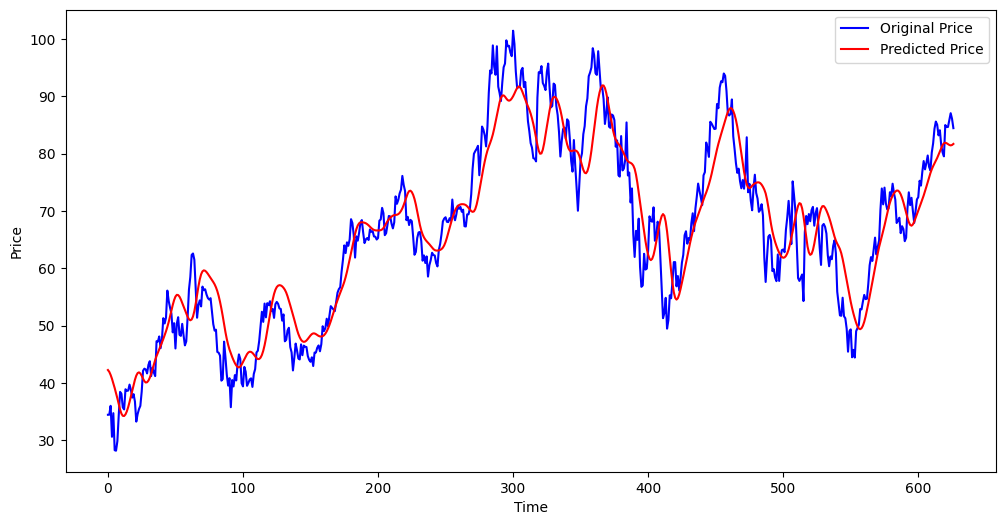

In [71]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [76]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.542532119013522
